In [1]:
import pymrio as mr
import pandas as pd
import numpy as np

# import numpy as np
# import scipy as sp
import pickle

# import os
# from pypardiso import spsolve
# from scipy.linalg import diagsvd
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle
import country_converter as coco

from sklearn import datasets, linear_model

%load_ext jupyter_black
%load_ext autoreload
%autoreload 2

# Charger les données
Nous avons besoin des séries temporelles économiques-environnementales pour 2010-2022.

In [2]:
# Load time series
years = range(2010, 2023)
EXIOBASE_FOLDER = "D:/EXIOBASE/3.9.6/"
FIGARO_FOLDER = "D:/FIGARO/"

exiobase = dict()
figaro = dict()

for year in years:

    print(year)

    with open(EXIOBASE_FOLDER + f"exiobase369_ixi_{year}.pkl", "rb") as f:
        exiobase[year] = pickle.load(f)

    with open(FIGARO_FOLDER + f"figaro2025_ixi_{year}.pkl", "rb") as f:
        figaro[year] = pickle.load(f)

2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022


# Empreinte environnementale de l'éducation

In [4]:
exiobase_2022 = exiobase[2022]

In [5]:
Z_educ = exiobase_2022.Z.xs("Education (80)", level="sector", axis=1)
Z_educ.head()

region                                                   AT        BE  \
region sector                                                           
AT     Cultivation of paddy rice               0.000000e+00  0.000000   
       Cultivation of wheat                    7.964639e-08  0.001022   
       Cultivation of cereal grains nec        2.403514e-01  0.000713   
       Cultivation of vegetables, fruit, nuts  8.129175e-01  0.000090   
       Cultivation of oil seeds                1.223187e+00  0.002130   

region                                               BG   CY        CZ  \
region sector                                                            
AT     Cultivation of paddy rice               0.000000  0.0  0.000000   
       Cultivation of wheat                    0.083485  0.0  0.000208   
       Cultivation of cereal grains nec        0.833322  0.0  0.002638   
       Cultivation of vegetables, fruit, nuts  0.101642  0.0  0.000782   
       Cultivation of oil seeds                0.068748  0.0  0.000956   

region                                               DE        DK  \
region sector                                                       
AT     Cultivation of paddy rice               0.000000  0.000000   
       Cultivation of wheat                    0.326705  0.000102   
       Cultivation of cereal grains nec        0.943482  0.001318   
       Cultivation of vegetables, fruit, nuts  0.176565  0.003514   
       Cultivation of oil seeds                0.449333  0.002228   

region                                                   EE        ES  \
region sector                                                           
AT     Cultivation of paddy rice               0.000000e+00  0.000000   
       Cultivation of wheat                    4.556628e-05  0.000553   
       Cultivation of cereal grains nec        1.708057e-03  0.003063   
       Cultivation of vegetables, fruit, nuts  7.307500e-04  0.000455   
       Cultivation of oil seeds                3.891061e-09  0.001080   

region                                                   FI  ...  \
region sector                                                ...   
AT     Cultivation of paddy rice               0.000000e+00  ...   
       Cultivation of wheat                    4.632184e-09  ...   
       Cultivation of cereal grains nec        7.870889e-09  ...   
       Cultivation of vegetables, fruit, nuts  2.219603e-02  ...   
       Cultivation of oil seeds                4.904351e-03  ...   

region                                                   TR   TW  \
region sector                                                      
AT     Cultivation of paddy rice               0.000000e+00  0.0   
       Cultivation of wheat                    1.053060e-09  0.0   
       Cultivation of cereal grains nec        1.702742e-09  0.0   
       Cultivation of vegetables, fruit, nuts  2.014975e-04  0.0   
       Cultivation of oil seeds                5.710765e-05  0.0   

region                                                   NO            ID  \
region sector                                                               
AT     Cultivation of paddy rice               0.000000e+00  0.000000e+00   
       Cultivation of wheat                    1.579873e-09  2.055114e-09   
       Cultivation of cereal grains nec        2.693261e-09  3.504276e-09   
       Cultivation of vegetables, fruit, nuts  3.556308e-03  2.346654e-08   
       Cultivation of oil seeds                4.283838e-03  2.604322e-09   

region                                                   ZA        WA  \
region sector                                                           
AT     Cultivation of paddy rice               0.000000e+00  0.000000   
       Cultivation of wheat                    7.601811e-09  0.001706   
       Cultivation of cereal grains nec        1.296420e-08  0.000011   
       Cultivation of vegetables, fruit, nuts  8.001310e-05  0.000150   
       Cultivation of oil seeds          

## Sélectionner le secteur "éducation" dans les empreintes

In [6]:
educ_air_emissions = exiobase_2022.air_emissions.D_cba.xs(
    "Education (80)", level="sector", axis=1
)

educ_air_emissions_cap = exiobase_2022.air_emissions.D_cba.xs(
    "Education (80)", level="sector", axis=1
).div(exiobase_2022.population.loc["population"], axis=1)

In [7]:
exiobase_2022.material.D_cba.loc["Domestic Extraction Used - Metal Ores - Iron ores"]

region  sector                                             
AT      Cultivation of paddy rice                                 0.004272
        Cultivation of wheat                                      1.160892
        Cultivation of cereal grains nec                          1.242218
        Cultivation of vegetables, fruit, nuts                   14.760925
        Cultivation of oil seeds                                  5.379477
                                                                  ...     
WM      Activities of membership organisation n.e.c. (91)       397.579258
        Recreational, cultural and sporting activities (92)    1472.717429
        Other service activities (93)                           967.763282
        Private households with employed persons (95)            84.350594
        Extra-territorial organizations and bodies                0.000000
Name: Domestic Extraction Used - Metal Ores - Iron ores, Length: 7987, dtype: float64

In [8]:
exiobase_2022.air_emissions.D_cba.loc["CO2 - combustion - air"].xs(
    "Education (80)", level="sector"
)

region
AT    6.095196e+09
BE    1.207622e+09
BG    3.135053e+09
CY    1.181110e+08
CZ    1.563808e+09
DE    6.145179e+09
DK    1.154781e+09
EE    2.266944e+08
ES    2.594370e+09
FI    1.212149e+09
FR    4.628986e+09
GR    1.054411e+09
HR    3.994447e+08
HU    8.442337e+08
IE    3.654192e+08
IT    3.899883e+09
LT    2.331055e+08
LU    1.455670e+08
LV    2.274225e+08
MT    2.804477e+08
NL    2.211857e+09
PL    4.247164e+09
PT    5.183286e+08
RO    7.793713e+08
SE    2.172191e+09
SI    3.330624e+08
SK    4.273206e+08
GB    8.241974e+09
US    2.970366e+11
JP    1.897632e+10
CN    1.957975e+11
CA    1.795377e+10
KR    1.959236e+10
BR    6.511894e+09
IN    3.407889e+10
MX    3.929962e+09
RU    2.502818e+10
AU    2.207755e+10
CH    1.200234e+09
TR    4.435487e+09
TW    3.413742e+09
NO    6.715209e+08
ID    1.641097e+10
ZA    2.048280e+10
WA    3.091484e+10
WL    1.573277e+10
WE    2.805847e+09
WF    3.801448e+10
WM    4.824821e+10
Name: CO2 - combustion - air, dtype: float64

In [9]:
exiobase_2022.air_emissions.D_cba_reg

region,AT,BE,BG,CY,CZ,DE,DK,EE,ES,FI,...,TR,TW,NO,ID,ZA,WA,WL,WE,WF,WM
stressor,,,,,,,,,,,,,,,,,,,,,
As - combustion - air,2.949061e+05,5.197503e+05,1.043210e+05,29087.394721,1.774957e+05,4.502752e+06,1.434974e+06,4.466508e+04,7.245477e+05,4.658679e+05,...,1.013019e+06,1.510244e+06,1.698575e+06,9.566689e+05,2.912339e+05,4.240383e+06,1.682078e+06,4.638586e+05,9.525671e+05,2.694822e+06
B(a)P - combustion - air,2.723851e+04,4.059426e+04,1.046840e+04,2280.174895,3.637387e+04,3.736110e+05,2.085733e+04,7.773209e+03,1.301823e+05,2.279654e+04,...,2.210638e+05,2.327264e+04,2.975831e+04,1.537950e+05,2.178451e+05,2.607129e+06,6.877985e+05,1.922514e+05,5.140414e+06,6.120411e+05
B(b)F - combustion - air,4.135534e+04,6.160929e+04,1.378902e+04,3340.244526,5.266226e+04,5.719107e+05,2.903068e+04,1.089586e+04,2.037359e+05,3.410196e+04,...,3.456986e+05,3.433874e+04,4.077590e+04,1.957421e+05,3.009828e+05,3.378246e+06,8.824341e+05,2.794055e+05,5.590561e+06,9.635576e+05
B(k)F - combustion - air,2.508737e+03,3.716874e+03,3.754066e+03,201.281368,7.950124e+03,1.993169e+04,4.368386e+03,1.795852e+03,7.248741e+03,2.745847e+03,...,3.782189e+04,5.409440e+03,6.490049e+03,6.242041e+04,1.003068e+05,1.056324e+06,2.419840e+05,4.302129e+04,2.982990e+06,5.438787e+04
CH4 - combustion - air,2.869788e+07,1.947338e+07,1.670149e+07,774776.954982,4.215709e+07,1.707580e+08,1.639636e+07,5.915403e+06,4.789288e+07,2.385551e+07,...,7.446450e+07,1.608677e+07,1.155759e+07,2.260960e+08,8.285255e+07,1.353401e+09,3.605829e+08,7.908080e+07,3.858281e+09,1.938541e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CO2 - waste - fossil - air,7.424305e+05,1.748252e+06,3.205069e+05,181776.452609,2.443893e+06,7.400659e+06,9.902171e+05,2.104545e+05,4.873867e+07,6.158302e+05,...,1.177691e+06,2.320408e+07,5.989118e+05,8.561656e+05,4.417100e+05,1.290927e+07,8.699545e+06,9.535593e+05,2.675886e+06,5.667115e+06
NH3 - waste - air,4.316407e+00,6.904789e+00,5.859605e-01,0.144435,7.777465e+01,3.383547e+01,2.365689e+00,1.495521e+00,9.631104e+01,1.197892e+01,...,4.356656e+00,6.206004e+00,1.776577e+01,2.217524e+00,1.212000e+00,1.659898e+01,1.282678e+01,4.873131e+00,6.591587e+00,1.570594e+01
NOX - waste - air,9.720039e+04,2.457895e+05,1.239318e+04,4548.451729,3.845286e+05,1.037997e+06,1.023032e+06,4.903859e+04,1.753915e+06,1.688219e+05,...,1.240039e+05,1.007423e+05,1.982343e+05,4.407490e+04,2.650036e+04,4.051189e+05,2.801508e+05,1.069969e+05,2.308719e+05,3.973210e+05


In [11]:
# GWP (PRG = pouvoir de réchauffement global)
# Facteurs des gaz à effet de serre
# CO2 = 1, CH4 = 28, N2O = 273
gwp = pd.read_csv("../exiobase/gwp.csv", encoding="utf-8", index_col=0)["GWP100"]
gwp

stressor
As - combustion - air         0.0
B(a)P - combustion - air      0.0
B(b)F - combustion - air      0.0
B(k)F - combustion - air      0.0
CH4 - combustion - air        0.0
                             ... 
CO2 - waste - fossil - air    1.0
NH3 - waste - air             0.0
NOX - waste - air             0.0
PM2.5 - waste - air           0.0
SOx - waste - air             0.0
Name: GWP100, Length: 418, dtype: float64

In [12]:
educ_ghg_cap = gwp @ educ_air_emissions_cap

<Axes: ylabel='region'>

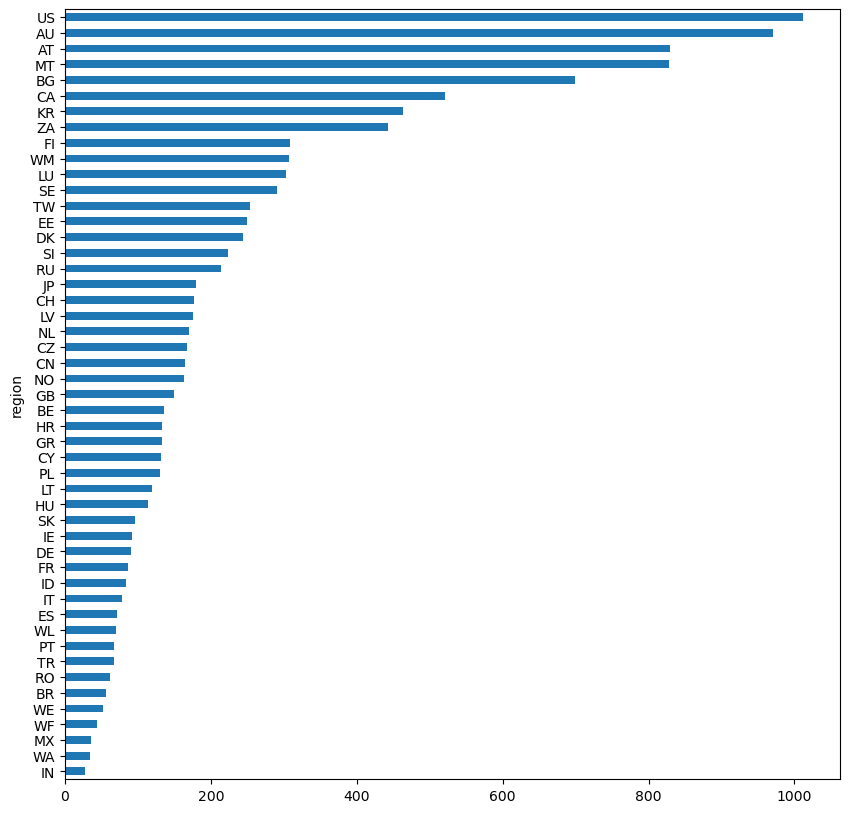

In [13]:
sns.set_style()

fig, ax = plt.subplots(figsize=(10, 10))
educ_ghg_cap.sort_values().plot.barh(ax=ax)

In [14]:
# We can also create the demand vector for the education sector only
educ_demand = (
    exiobase_2022.Y.xs("Education (80)", level="sector", drop_level=False)
    .groupby("region", axis=1)
    .sum()
)
educ_demand.head()

C:\Users\Gibon\AppData\Local\Temp\ipykernel_10268\2596044206.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  .groupby("region", axis=1)


,region,AT,AU,BE,BG,BR,CA,CH,CN,CY,CZ,...,SK,TR,TW,US,WA,WE,WF,WL,WM,ZA
region,sector,,,,,,,,,,,,,,,,,,,,,
AT,Education (80),101391.799028,2.477158,5.073943,0.979539,4.507762,4.409756,3.884513,3.807339,8.195608e-01,3.499253,...,3.391813,3.204857,13.530806,4.614873,0.378800,4.507764,4.439989,5.660236,7.875603,2.921045
BE,Education (80),4.462371,3.833100,34331.407442,2.285811,6.546365,5.900690,2.903506,6.311862,1.348699e+00,4.738391,...,4.105056,4.791825,16.588460,19.465970,1.370882,4.645786,79.922300,24.732078,39.910921,3.917960
BG,Education (80),19.334048,5.275431,21.828003,23744.444233,9.126701,11.936460,3.276311,3.677702,2.240388e-01,24.667755,...,16.632382,48.083861,30.743743,23.905327,3.168559,35.322576,8.217618,13.362145,62.817959,4.829639
CY,Education (80),0.636130,0.633193,0.999670,0.288165,1.079915,1.106423,0.538109,1.551145,1.182936e+03,0.872910,...,0.782117,1.066386,3.553933,0.873365,0.078293,0.752590,1.072788,1.483061,1.666880,0.840870
CZ,Education (80),1.506929,0.731599,1.501575,0.202294,1.313478,1.491888,0.466583,1.609248,2.784039e-07,10264.523012,...,2.850502,1.135798,5.280665,2.645383,0.325820,0.952673,0.919134,1.901197,2.721450,0.531887


In [15]:
# It would be interesting to compare against expenses
educ_expenses_cap = (
    educ_demand.sum().div(exiobase_2022.population.loc["population"]) * 1e6
)
educ_expenses_cap

AT    11248.564674
AU     4525.548669
BE     3039.762789
BG     3501.462505
BR      460.162381
CA     3333.365268
CH      552.171786
CN      484.591835
CY     1255.455594
CZ     1014.881884
DE     2203.924141
DK     3862.828880
EE      740.774082
ES     1614.747415
FI     1729.937544
FR      846.087539
GB     2621.884163
GR     2160.976910
HR      965.816430
HU      905.117791
ID      184.044378
IE      711.870049
IN       95.241934
IT     1381.196402
JP     2439.018195
KR     1871.494267
LT      847.976053
LU     3232.266016
LV     1273.081027
MT     5105.784373
MX      432.769081
NL     2456.887381
NO     4063.791309
PL      799.752052
PT     1564.219835
RO      489.509228
RU      469.999897
SE     3142.757824
SI     1667.141666
SK      800.249289
TR      678.097615
TW      931.219327
US     6388.859990
WA      120.585239
WE      250.252694
WF       50.788823
WL      356.091229
WM      788.797200
ZA      339.062549
dtype: float64

In [16]:
X = np.array(educ_expenses_cap).reshape(-1, 1)

reg = linear_model.LinearRegression()
reg.fit(X, educ_ghg_cap)

# Logarithmic regression: footprint ~ intercept + slope * log(expenses)
X_log = np.log(X)

log_reg = linear_model.LinearRegression()
log_reg.fit(X_log, educ_ghg_cap)

log_reg_weighted = linear_model.LinearRegression()
log_reg_weighted.fit(
    X_log,
    educ_ghg_cap,
    sample_weight=np.exp(-((X - 500) ** 2) / 7000).reshape(-1),
)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
### Get predicted values of Y
X_log = np.log(X)
Y_pred = reg.predict(X)
Y_pred_log = log_reg.predict(X_log)
Y_pred_log_weighted = log_reg_weighted.predict(X_log)

C:\Users\Gibon\AppData\Local\Temp\ipykernel_10268\3549096440.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(row[0], (row[1][0] + offset_x, row[1][1] + offset_y))


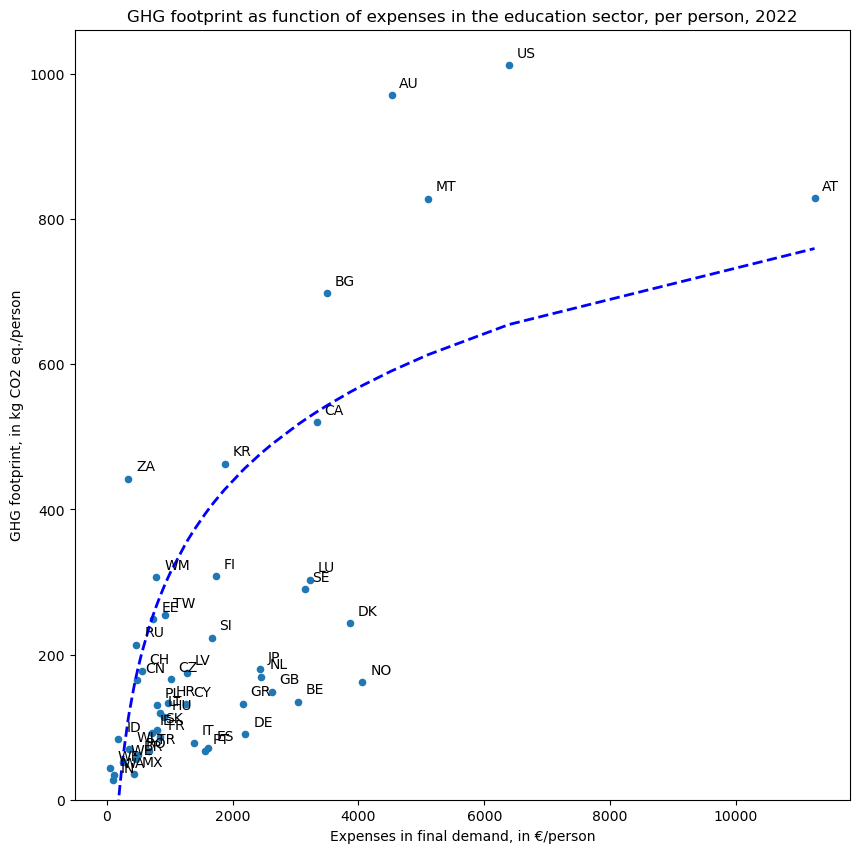

In [18]:
# Scatter plot, footprint vs. expenses
sns.set_style()

GHG_EUR = pd.concat(
    [educ_expenses_cap, educ_ghg_cap],
    keys=["Expenses (€)", "GHG footprint (kg CO2 eq.)"],
    axis=1,
)

fig, ax = plt.subplots(figsize=(10, 10))
GHG_EUR.plot.scatter(x="Expenses (€)", y="GHG footprint (kg CO2 eq.)", ax=ax)
ax.set_title(
    "GHG footprint as function of expenses in the education sector, per person, 2022"
)
ax.set_ylabel("GHG footprint, in kg CO2 eq./person")
ax.set_xlabel("Expenses in final demand, in €/person")


ylim = ax.get_ylim()
ax.set_ylim(0, ylim[1])
offset_y = (ylim[1] - ylim[0]) / 100
xlim = ax.get_xlim()
offset_x = (xlim[1] - xlim[0]) / 100


ax.plot(
    sorted(X),
    sorted(Y_pred_log_weighted),
    color="blue",
    linestyle="--",
    label="Logarithmic (weighted)",
    linewidth=2,
)


for row in GHG_EUR.iterrows():
    ax.annotate(row[0], (row[1][0] + offset_x, row[1][1] + offset_y))

In [19]:
exiobase_2022.material.D_cba.loc[
    "Domestic Extraction Used - Fossil Fuels - Crude oil"
].xs("Education (80)", level="sector").div(
    exiobase_2022.population.loc["population"]
) * 1000000

region
AT     99.049860
BE     10.776467
BG     27.949840
CY      5.050413
CZ      5.783999
DE      5.609268
DK     19.346832
EE     11.026144
ES      8.524411
FI     19.287395
FR      4.025391
GR     35.161452
HR     11.324035
HU      6.813714
IE      7.703206
IT      5.786526
LT      7.484368
LU     23.317840
LV      6.899127
MT     62.155505
NL     35.571067
PL      5.067780
PT      5.003762
RO      3.483032
SE     23.665229
SI     11.730016
SK      5.326552
GB     13.219387
US    173.368907
JP     20.353564
CN     13.850606
CA     64.675182
KR     56.444059
BR      6.259278
IN      1.194462
MX      4.160241
RU      8.974008
AU     73.097775
CH     14.968615
TR      3.534594
TW      5.431918
NO     55.871034
ID      7.830615
ZA     13.939620
WA      2.401746
WL      9.355846
WE      4.018364
WF      2.013351
WM      9.483320
dtype: float64